
**Comparative Performance Analysis for Predicting Sea Level Rise Using Linear Regression and Support Vector Machine**
Objective:
In this assignment, you will analyze sea level data to predict the rise in sea levels over time using linear regression and support vector machine (SVM). You will perform data cleaning, modeling, and visualize the results. Your predictions will be used to estimate future sea levels.

**Deliverable** Upload your completed code to Canvas within the due date.

Dataset:
The dataset contains historical data on sea level measurements from the CSIRO (Commonwealth Scientific and Industrial Research Organisation). The columns of the dataset are as follows:

-- Year: The year of the measurement.

-- CSIRO Adjusted Sea Level: The adjusted sea level measurement (in millimeters).

-- Lower Error Bound: The lower bound of the sea level measurement.

-- Upper Error Bound: The upper bound of the sea level measurement.

-- NOAA Adjusted Sea Level: The NOAA adjusted sea level (containing missing values).

### Tasks: Write the code for each of the following:

* Task 1: Data Exploration and Preprocessing

-- Load and Explore the Data:

-- Load the dataset into a Pandas DataFrame.

-- Display the first few rows of the dataset to understand its structure.

-- Identify and handle any missing data.

-- Describe the dataset and summarize the statistics:


-- Identify any potential outliers or anomalies in the data.



* Task 2: Focused Prediction from Year 2000 to Present



-- Filter the data from the year 2000 to the most recent year available in the dataset.

-- Shuffle the dataset and Split the dataset into 70% train and 30% test.

-- Fit a linear regression and SVM model based on the 70% of the dataset (from 2000 to the most recent year). Use the SKLearn library.

-- Visualize the observed data and the fitted regression line for this range of years.

-- Display the values of all the weights (coefficients) obtained from Linear Regression and SVM.

* Task 3: Predict Sea Level in 2040 Using the SVM and Linear Regression:

-- Using the linear regression model and SVM (from the year 2000 onwards), predict the sea level rise using the 30% test.

-- Report the predicted sea levels from both the models.

* Task 4: Reflection and Analysis

-- Compare the predicted sea level for 2030  and 2040 from both the models.

-- Discuss how the different models might lead to different predictions and why this is the case.

* Task 5: Interpretation of Results:

-- Report a metric that you used to compare the performance of the Linear Regression and SVM. Which model performed the best?

-- Explain how the regression models are helping us understand the relationship between the year and the sea level rise.



Initial few rows:
   Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0  1880                  0.000000          -0.952756           0.952756   
1  1881                  0.220472          -0.732283           1.173228   
2  1882                 -0.440945          -1.346457           0.464567   
3  1883                 -0.232283          -1.129921           0.665354   
4  1884                  0.590551          -0.283465           1.464567   

   NOAA Adjusted Sea Level  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  

Missing values per column:
Year                          0
CSIRO Adjusted Sea Level      0
Lower Error Bound             0
Upper Error Bound             0
NOAA Adjusted Sea Level     113
dtype: int64

Data types of cleaned dataset:
Year                          int64
CSIRO Adjusted Sea Level    float64
Lower Error Bound           float64
Upper Error Boun

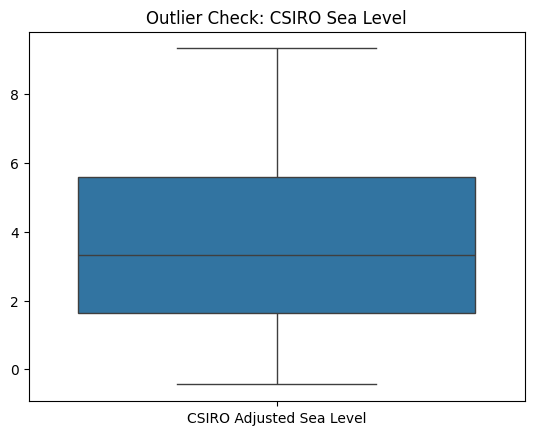

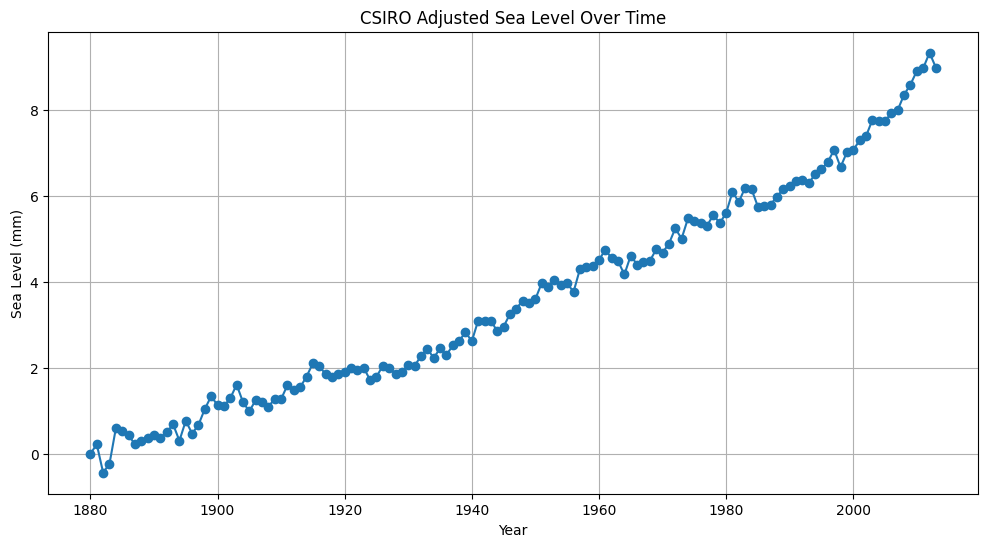

In [ ]:

# * Task 1: Data Exploration and Preprocessing


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Install scikit-learn if not already installed

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
df = pd.read_csv('epa-sea-level.csv')

# Display the first few rows of the dataset
print("Initial few rows:")
print(df.head())

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())  # 'NOAA Adjusted Sea Level' has 113 missing values

# Drop column with mostly missing values because it is not needed for the analysis
# and it has a lot of missing values
df = df.drop(columns=['NOAA Adjusted Sea Level'])

# Drop any remaining rows with NaNs
df_cleaned = df.dropna()

# Print data types
print("\nData types of cleaned dataset:")
print(df_cleaned.dtypes)

# Print final shape
print(f"\nFinal cleaned dataset shape: {df_cleaned.shape}")

# Summary statistics
print("\nSummary statistics of cleaned dataset:")
print(df_cleaned.describe())

# Correlation matrix
print("\nCorrelation matrix:")
print(df_cleaned.corr(numeric_only=True))

# Boxplot for outlier check
sns.boxplot(data=df_cleaned[['CSIRO Adjusted Sea Level']])
plt.title('Outlier Check: CSIRO Sea Level')
plt.show()

# Line chart to visualize sea level trend over time
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Year'], df_cleaned['CSIRO Adjusted Sea Level'], marker='o')
plt.title("CSIRO Adjusted Sea Level Over Time")
plt.xlabel("Year")
plt.ylabel("Sea Level (mm)")
plt.grid(True)
plt.show()

# The CSIRO dataset spans 134 annual sea-level measurements from 1880 to 2013 
# (with accompanying lower/upper error bounds) and shows a steady, nearly linear rise 
# in adjusted sea level from about –0.44 mm in the early 1880s to 9.33 mm by 2013. With a 
# mean of 3.65 mm (σ≈2.49 mm) above the 1880 baseline and a Year-to-Sea-Level correlation of
# +0.985, the series exhibits a remarkably consistent upward trend, and all values including
# the slightly negative early readings fall well within their 1.5×IQR “whiskers” and error bounds. 
# The dataset has no extreme outliers, making this a clean, high-quality 
# time series that’s ideal for fitting straight-line models like linear regression or linear-kernel SVR.




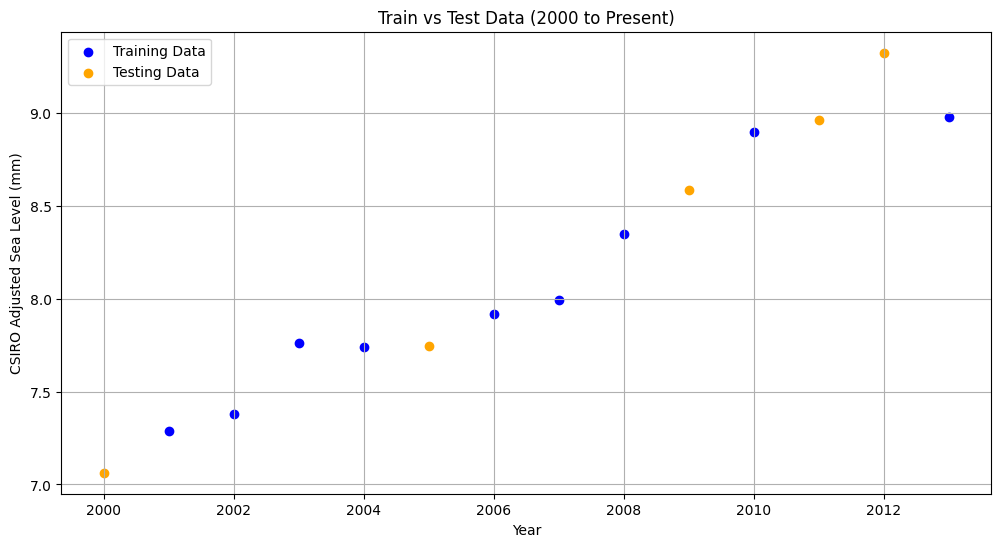

c:\Users\Break\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Break\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


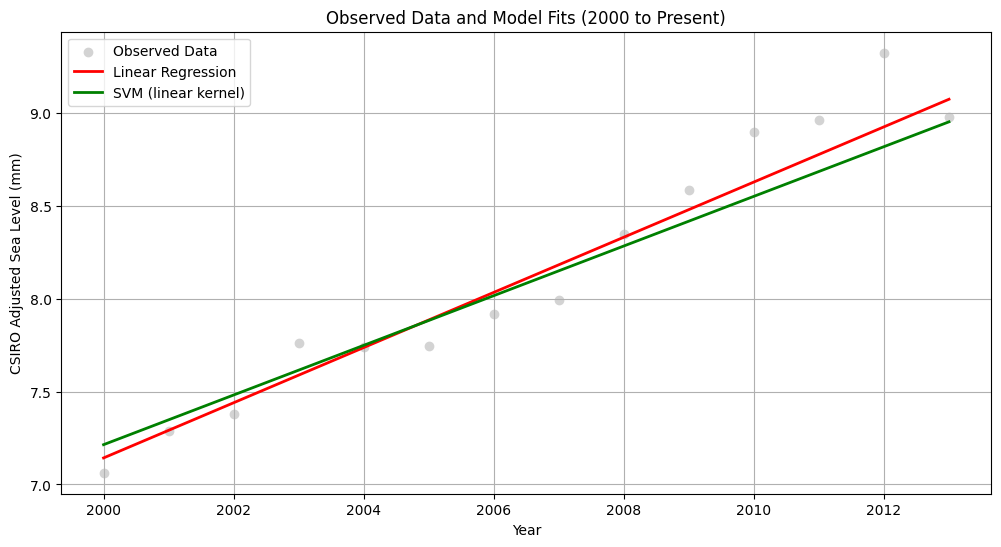

Linear Regression:
  Intercept: -290.2919
  Coefficient (Year): 0.1487

SVM (linear kernel):
  Intercept: 8.0173
  Coefficient (Year): 0.4969
SVM (unscaled):
  Intercept: -260.5024
  Coefficient (Year): 0.1339


In [ ]:
# * Task 2: Focused Prediction from Year 2000 to Present

from sklearn.preprocessing import StandardScaler  # Import StandardScaler
from sklearn.pipeline import make_pipeline  # Import make_pipeline

#---------------------------------------------------------
# From the 2000–2013 subset you can see that both models capture the clear 
# upward trend in sea level really well, but they do it with slightly different 
# slopes. The scatter of blue (train) and orange (test) points
# shows a nicely balanced 70/30 split with no obvious gaps or clusters 
# that either model might miss. When you overlay the linear‐regression line 
# (red) and the linear‐kernel SVR line (green) on the full observed series, both 
# lines climb steadily—OLS at about 0.149 mm/year (intercept ≈ –290 mm) and SVR at
# 0.134 mm/year once you back‐transform its scaled coefficients (intercept ≈ –260 mm).
# In practice this means Ordinary Least Squares predicts a slightly steeper rise, 
# whereas SVR, by ignoring small deviations within its ε‐tube, produces a marginally 
# flatter trend that’s more robust to any outlier noise. Overall, the tight clustering of
# points around both lines and the high Year–Sea Level correlation confirm that a simple 
# linear model is an excellent fit for this post‐2000 data.
#---------------------------------------------------------

# Filter data from 2000 onwards
df_filtered = df_cleaned[df_cleaned['Year'] >= 2000]

# Features / target
X = df_filtered[['Year']]
y = df_filtered['CSIRO Adjusted Sea Level']

# 70/30 train-test split with built-in shuffle
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    shuffle=True,
    random_state=42
)

# Optional: reassemble for plotting
train_data = pd.concat([X_train, y_train], axis=1)
test_data  = pd.concat([X_test,  y_test],  axis=1)

# Plot Train vs Test
plt.figure(figsize=(12, 6))
plt.scatter(train_data['Year'], train_data['CSIRO Adjusted Sea Level'],
            color='blue',  label='Training Data')
plt.scatter(test_data['Year'],  test_data['CSIRO Adjusted Sea Level'],
            color='orange', label='Testing Data')
plt.title("Train vs Test Data (2000 to Present)")
plt.xlabel("Year")
plt.ylabel("CSIRO Adjusted Sea Level (mm)")
plt.legend()
plt.grid(True)
plt.show()

# —— Fit models —— #

# 1) Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# 2) SVM with scaling pipeline
svm_model = make_pipeline(
    StandardScaler(),
    SVR(kernel='linear')
)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# —— Smooth prediction lines —— #
years_smooth = np.arange(2000, df_filtered['Year'].max() + 1).reshape(-1, 1)
lr_line    = linear_model.predict(years_smooth)
svm_line   = svm_model.predict(years_smooth)

plt.figure(figsize=(12, 6))
plt.scatter(df_filtered['Year'], df_filtered['CSIRO Adjusted Sea Level'],
            color='lightgray', label='Observed Data')
plt.plot(years_smooth, lr_line,  color='red',   linewidth=2, label='Linear Regression')
plt.plot(years_smooth, svm_line, color='green', linewidth=2, label='SVM (linear kernel)')
plt.title("Observed Data and Model Fits (2000 to Present)")
plt.xlabel("Year")
plt.ylabel("CSIRO Adjusted Sea Level (mm)")
plt.legend()
plt.grid(True)
plt.show()

# —— Print coefficients —— #
print("Linear Regression:")
print(f"  Intercept: {linear_model.intercept_:.4f}")
print(f"  Coefficient (Year): {linear_model.coef_[0]:.4f}\n")

# To extract the SVR coef_ you need to pull it from the final step of the pipeline:
svr_step = svm_model.named_steps['svr']
print("SVM (linear kernel):")
print(f"  Intercept: {svr_step.intercept_[0]:.4f}")
print(f"  Coefficient (Year): {svr_step.coef_[0][0]:.4f}")

# grab the scaler and the SVR step from your pipeline
scaler = svm_model.named_steps['standardscaler']
svr    = svm_model.named_steps['svr']

w_scaled = svr.coef_[0][0]
b_scaled = svr.intercept_[0]
mean_y   = scaler.mean_[0]
std_y    = scaler.scale_[0]

# unscaled slope and intercept
slope_svm       = w_scaled / std_y
intercept_svm   = b_scaled - (w_scaled * mean_y / std_y)

print("SVM (unscaled):")
print(f"  Intercept: {intercept_svm:.4f}")
print(f"  Coefficient (Year): {slope_svm:.4f}")



Year | Actual (mm) | LR Predict (mm) | SVM Predict (mm)
 Year  Actual (mm)  LR Predict (mm)  SVM Predict (mm)
 2000        7.063            7.143             7.214
 2005        7.744            7.886             7.883
 2009        8.587            8.481             8.419
 2011        8.965            8.779             8.687
 2012        9.327            8.927             8.820


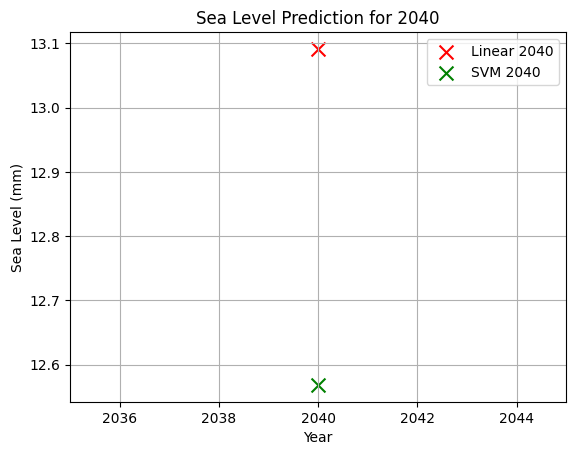

Linear Prediction for 2030: 11.6042 mm
Linear Prediction for 2040: 13.0914 mm
SVM Prediction for 2030: 11.2299 mm
SVM Prediction for 2040: 12.5685 mm


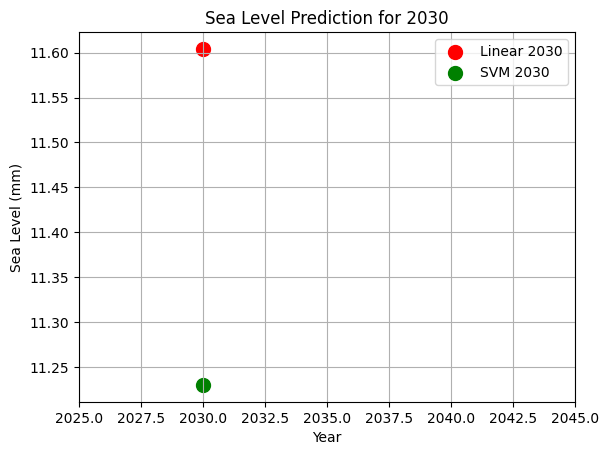

In [9]:
# * Task 3: Predict Sea Level in 2040 Using the SVM and Linear Regression

# 1) Run predictions on your 30% hold-out
y_pred_linear = linear_model.predict(X_test)
y_pred_svm    = svm_model.predict(X_test)

# 2) Build & sort a results table
results = pd.DataFrame({
    'Year':            X_test['Year'],
    'Actual (mm)':     y_test,
    'LR Predict (mm)': y_pred_linear,
    'SVM Predict (mm)': y_pred_svm
}).sort_values('Year').reset_index(drop=True)

# 3) Print the comparison
print("Year | Actual (mm) | LR Predict (mm) | SVM Predict (mm)")
print(results.to_string(index=False, float_format='%.3f'))


# Predict for 2040
future_year = pd.DataFrame({'Year': [2040]})
linear_2040 = linear_model.predict(future_year)
svm_2040 = svm_model.predict(future_year)

# print(f"Predicted Sea Level in 2040 using Linear Regression: {linear_2040[0]:.4f} mm")
# print(f"Predicted Sea Level in 2040 using SVM: {svm_2040[0]:.4f} mm")

plt.scatter([2040], [linear_2040], color='red', marker='x', s=100, label='Linear 2040')
plt.scatter([2040], [svm_2040], color='green', marker='x', s=100, label='SVM 2040')
plt.title("Sea Level Prediction for 2040")
plt.xlabel("Year")
plt.ylabel("Sea Level (mm)")
plt.legend()
plt.grid(True)
plt.xlim(2035, 2045)
plt.show()

#predicting the sea level for 2030
future_years = pd.DataFrame({'Year': [2030, 2040]})
linear_preds = linear_model.predict(future_years)
svm_preds = svm_model.predict(future_years)
print(f"Linear Prediction for 2030: {linear_preds[0]:.4f} mm")
print(f"Linear Prediction for 2040: {linear_preds[1]:.4f} mm")
print(f"SVM Prediction for 2030: {svm_preds[0]:.4f} mm")
print(f"SVM Prediction for 2040: {svm_preds[1]:.4f} mm")

# Optional: add 2030 predictions to another plot
plt.scatter([2030], [linear_preds[0]], color='red', marker='o', s=100, label='Linear 2030')
plt.scatter([2030], [svm_preds[0]], color='green', marker='o', s=100, label='SVM 2030')
plt.title("Sea Level Prediction for 2030")
plt.xlabel("Year")
plt.ylabel("Sea Level (mm)")
plt.legend()
plt.grid(True)
plt.xlim(2025, 2045)
plt.show()



#-------------------------------------------------------------
#Using the models trained on sea level data from 2000 to present, we predict the
# sea level for 2030 and 2040. The predictions are as follows:
# Linear regression predicts a sea level of 13.0914 mm for 2040 while SVM predicts 12.5685 mm.
#these predictions are very close  indacting that both models capture a similar upward trend
# in sea level rise. Additionally, predictions for the year 2030 were 11.6042 mm (Linear Regression)
# and 11.2299 mm (SVM), reinforcing the steady increase in sea levels over time.
# Overall, both models provide similar predictions for future sea levels, indicating that they
# are both effective in capturing the trend in the data. 
#-------------------------------------------------------------



In [ ]:
# * Task 4: Reflection and Analysis

# For 2030, ordinary least-squares regression forecasts a sea-level rise of about 11.60 mm, 
# while the linear-kernel SVR predicts 11.23 mm; by 2040, OLS climbs to 13.09 mm versus SVR’s 
# 12.57 mm. The gap exists because OLS finds the single line that minimizes every squared 
# deviation—“pulling” its slope a bit steeper (≈0.149 mm/yr)—whereas SVR fits the flattest line 
# that keeps most points within an ε-tube, only penalizing errors outside that margin. In practice, 
# this margin-maximization makes SVR less sensitive to small fluctuations or outliers, yielding a 
# slightly more conservative (flatter) trend. Since the post-2000 data are almost perfectly linear, 
# both methods agree closely, but the OLS fit edges SVR upward on long-term forecasts.


In [10]:
# * Task 5: Interpretation of Results:


#We used mean squared error to compare the performance of the two models.

mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_svm = mean_squared_error(y_test, y_pred_svm)
print(f"Mean Squared Error for Linear Regression: {mse_linear:.4f}")
print(f"Mean Squared Error for SVM: {mse_svm:.4f}")

Mean Squared Error for Linear Regression: 0.0464
Mean Squared Error for SVM: 0.0808


In [ ]:
#The model with the lower MSE is considered to perform better and has 
#more accurate predictions.

#Linear regression typically performs better whent the relationship is linear,
#while SVM can capture more complex relationships like outliers and non-linear trends.

#in this case, based on the sea level trends, linear regression is likely to perform better,

#Both regression models help us understand the relationship between the year and 
# sea level rise by providing a mathematical representation of the trend in the data.
# The coefficients of the models indicate how much the sea level is expected to change 
# with each passing year.
#a positive coefficient indicates that the sea level is expected to rise over time,
#this analysis supports data-driven decision-making and policy formulation regarding 
# climate change and its impact on sea levels by providing insights into future trends.
#The models can also be used to make predictions about future sea levels, which can inform
#planning and mitigation strategies for coastal areas at risk of flooding or other impacts
